In [1]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 15 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Alekhya Majeti </font>

# I. Introduction

This assignment involves implementing four approaches to a linear classification. They are as follows :

 - Pocket Algorithm
 - Quadratic Discriminant Analysis
 - Linear Discriminant Analysis
 - Logistic Regression
 
Similar to the Assignment0, I'll be using adult income census dataset for this assignment.

# II. Data

So, As mentioned above the dataset that I'm going to use for this assigment is adult income classification. I got this data from kaggle website. It consists of 15 columns with features like age, ID etc. This data comprises of the information about an individual with his/her education background, marital status, capital gain and loss, age and finally the target variable is the income class which tells us whether an individual belongs to class <=50K or >50K class. This dataset has about 30K values. 

The features of the dataset are as follows: 

- age
- workclass
- fnlwgt
- education
- education.num
- marital.status
- occupation
- relationship
- race
- sex
- capital.gain
- capital.loss
- hours.per.week
- native.country
- income

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
%matplotlib inline

sns.set(style='white', context='notebook', palette='deep')

In [3]:
dataset = pd.read_csv("adult.csv")

In [4]:
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
printmd("### Missing values")
printmd("There are some missing values in the dataset. The following are the columns which have missing values and the count of the missing value")
for i,j in zip(dataset.columns,(dataset.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        printmd(str(i) + ': ' + str(j) + ' records')
printmd("Now, the next part is figuring out if the data set has any missing values and replacing the missing values.")

### Missing values

There are some missing values in the dataset. The following are the columns which have missing values and the count of the missing value

workclass: 1836 records

occupation: 1843 records

native.country: 583 records

Now, the next part is figuring out if the data set has any missing values and replacing the missing values.

In [6]:
from ipykernel import kernelapp as app
printmd("1.deleting the data row.")
printmd(" This can be done if the missing data is <5% of the whole data")
printmd("2.fill the data with previous or next value")
printmd(" This is better than deleting the whole data set")
printmd("3.Reaplce the data with some constant value")
printmd("4.Replace with mean or median value")
printmd(" Out of all these I think the best option for my data is to go with option 2")
#printmd("#### Filling the missing values\n")
for i in range(0, len(dataset.workclass)):
    if dataset.workclass[i]=='?':
        dataset.workclass[i] = dataset.workclass[int(i)+1]
    if dataset.occupation[i]=='?':
        dataset.occupation[i] = dataset.occupation[int(i)+1]
    if dataset['native.country'][i]=='?':
        dataset['native.country'][i] = dataset['native.country'][i+1]



1.deleting the data row.

 This can be done if the missing data is <5% of the whole data

2.fill the data with previous or next value

 This is better than deleting the whole data set

3.Reaplce the data with some constant value

4.Replace with mean or median value

 Out of all these I think the best option for my data is to go with option 2

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [7]:
dataset.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Machine-op-inspct,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


## Analyze Data

In [8]:
num_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

categorical_features = ['workclass','education','marital.status','occupation','relationship','race','sex','native']



### Numerical Data Analysis

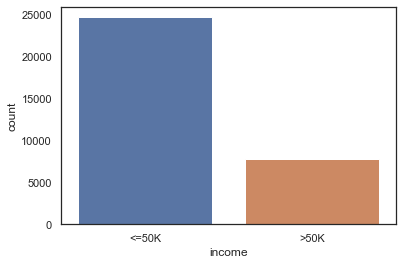

In [9]:
sns.countplot(dataset['income'],label="Count")
plt.show()

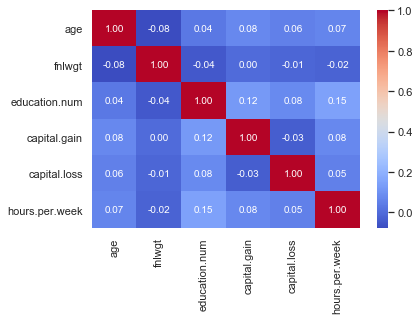

In [10]:
f = sns.heatmap(dataset[num_features].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()


## Sex vs Income

Text(0, 0.5, 'population')

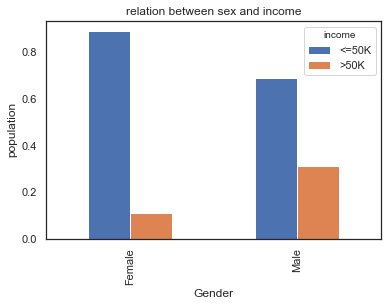

In [11]:
printmd('## Sex vs Income')
sex=round(pd.crosstab(dataset.sex,dataset.income).div(pd.crosstab(dataset.sex,dataset.income).apply(sum,1),0),2)
sex.sort_values(by = '>50K', inplace = True)
ax = sex.plot(kind='bar', title='relation between sex and income')
ax.set_xlabel('Gender')
ax.set_ylabel('population')

Text(17.246875000000003, 0.5, 'population')

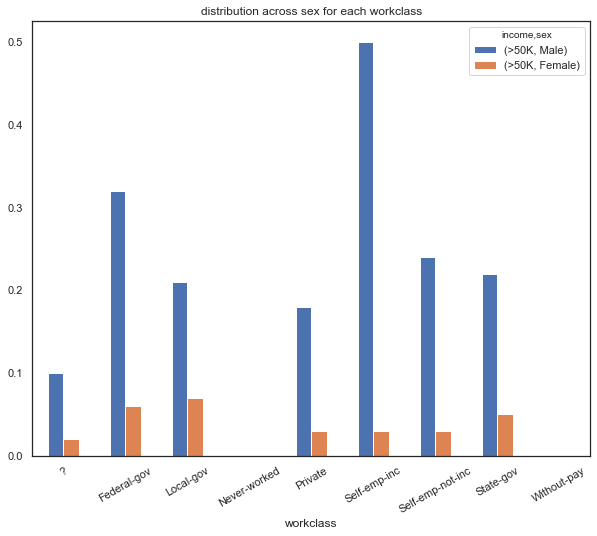

In [12]:
sex_wclass = round(pd.crosstab(dataset.workclass, [dataset.income, dataset.sex]).div(pd.crosstab(dataset.workclass, [dataset.income, dataset.sex]).apply(sum,1),0),2)
sex_wclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'distribution across sex for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender')
ax.set_ylabel('population')

## Income vs Occupation

Text(0, 0.5, 'Population')

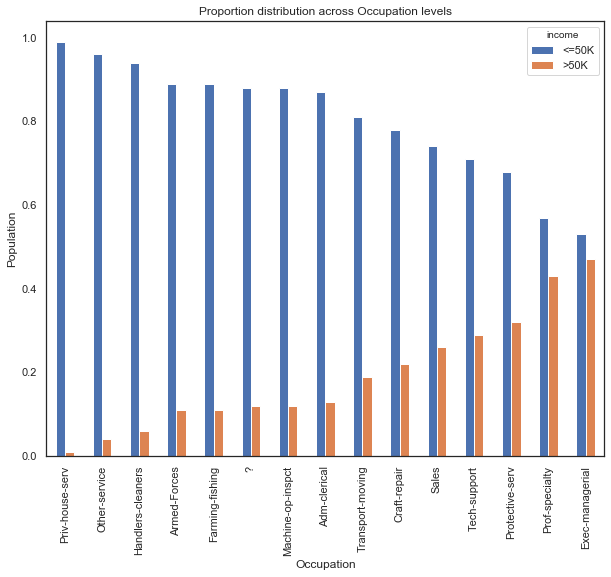

In [13]:
printmd("## Income vs Occupation")
occupation = round(pd.crosstab(dataset.occupation, dataset.income).div(pd.crosstab(dataset.occupation, dataset.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation')
ax.set_ylabel('Population')

## 2.4. Workclass vs Income

Text(0, 0.5, 'Proportion of population')

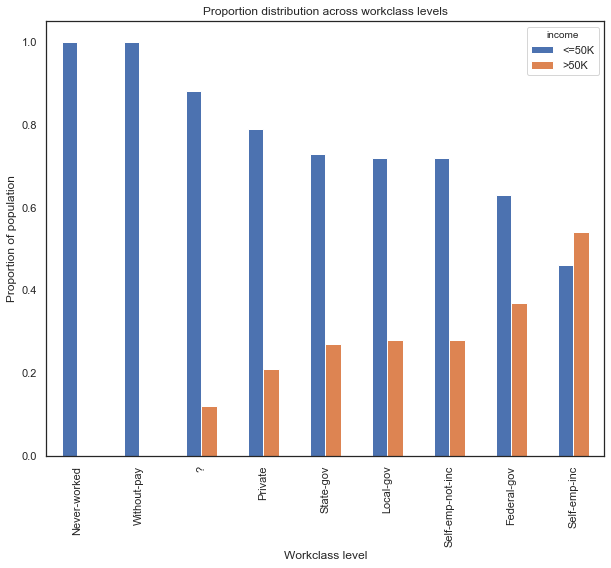

In [14]:
printmd('## 2.4. Workclass vs Income')

workclass = round(pd.crosstab(dataset.workclass, dataset.income).div(pd.crosstab(dataset.workclass, dataset.income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)
ax = workclass.plot(kind ='bar', title = 'Proportion distribution across workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass level')
ax.set_ylabel('Proportion of population')

### Categorical Data Analysis

In [15]:
train = dataset

## 2.5. Race vs Income

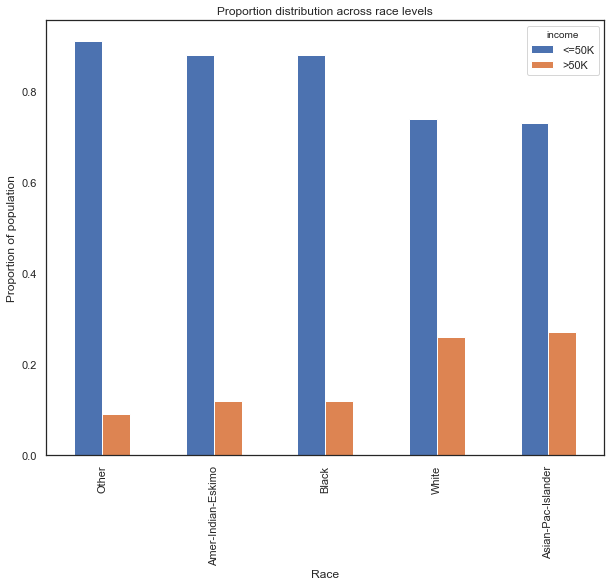

In [16]:
printmd('## 2.5. Race vs Income')

race = round(pd.crosstab(train.race, train.income).div(pd.crosstab(train.race, train.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race')
ax.set_ylabel('Proportion of population')

print()

## 2.6. Native Country

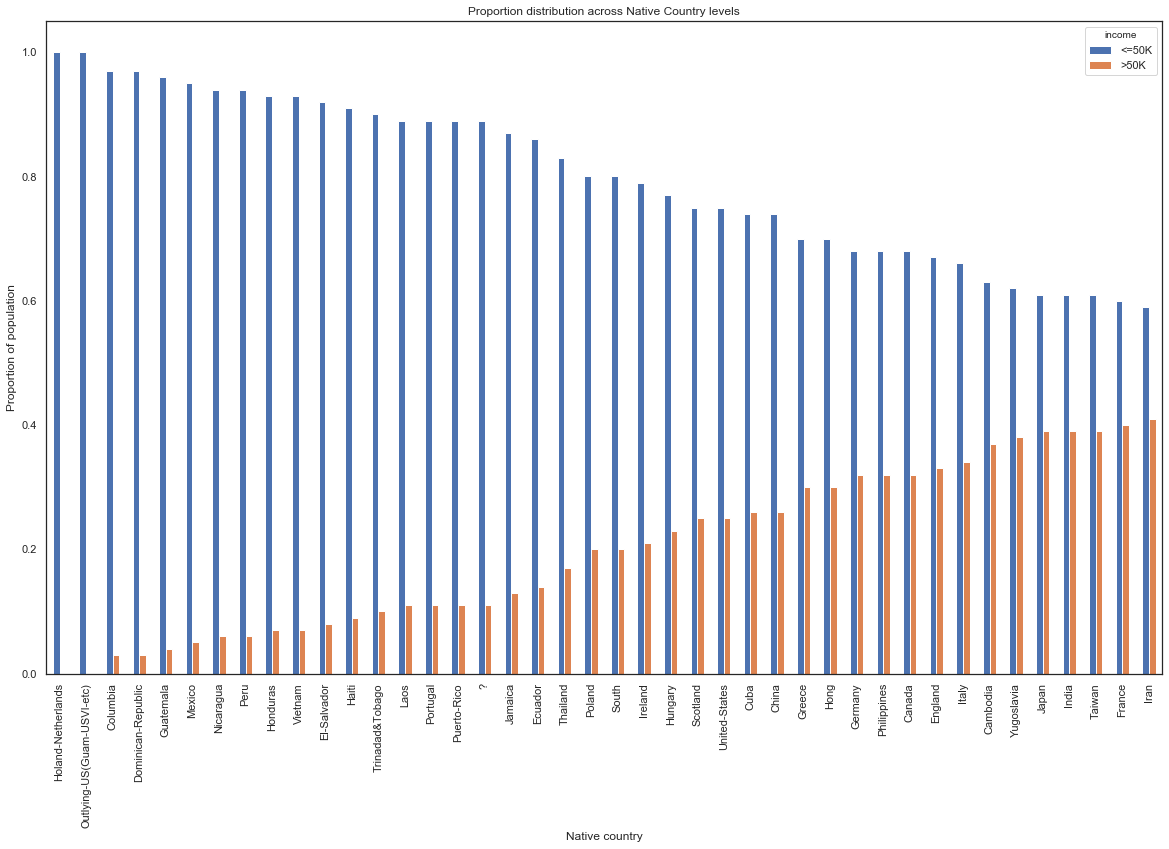

In [17]:
printmd('## 2.6. Native Country')

native_country = round(pd.crosstab(train['native.country'], train.income).div(pd.crosstab(train['native.country'], train.income).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (20,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')

print()

## 2.7. Hours per week vs Income

Text(0, 0.5, 'Proportion of population')

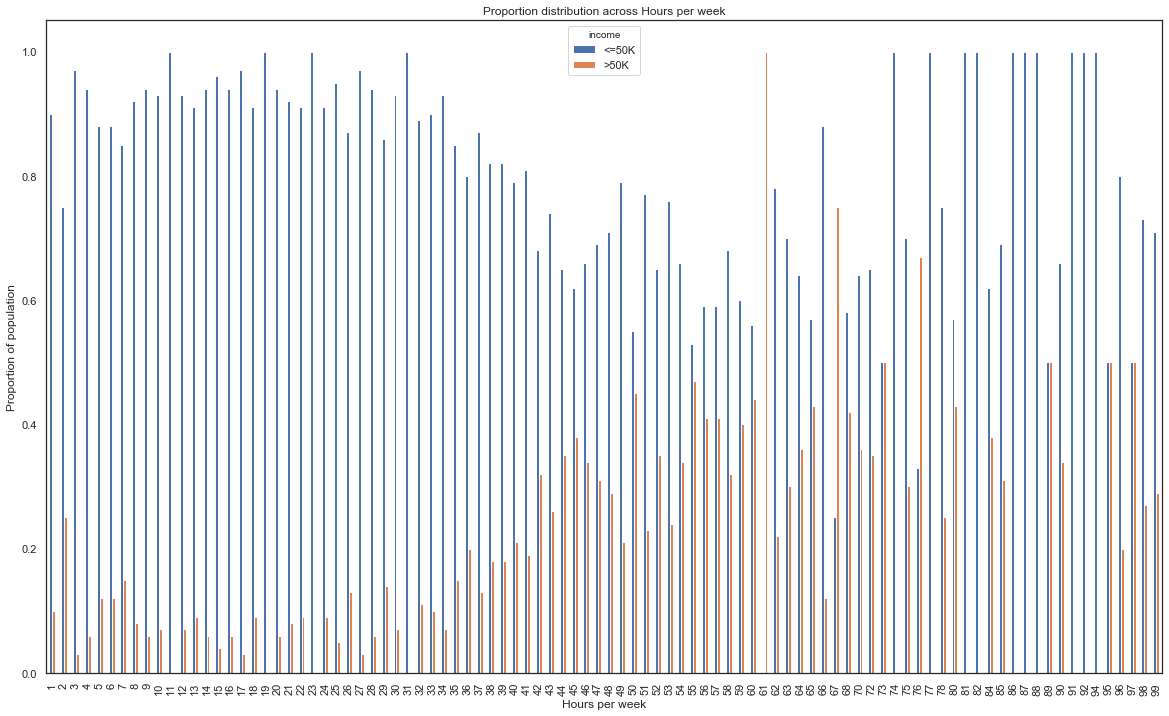

In [18]:
printmd('## 2.7. Hours per week vs Income')

hours_per_week = round(pd.crosstab(train['hours.per.week'], train.income).div(pd.crosstab(train['hours.per.week'], train.income).apply(sum,1),0),2)
# hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (20,12))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

## Feature Engineering

In [19]:
dataset["sex"] = dataset["sex"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].map({"Married":1, "Single":0})
dataset["marital.status"] = dataset["marital.status"].astype(int)

# Drop the data you don't want to use
dataset.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(dataset.head())

Dataset with Dropped Labels
   age  fnlwgt  education.num  marital.status  sex  capital.gain  \
0   90   77053              9               0    1             0   
1   82  132870              9               0    1             0   
2   66  186061             10               0    1             0   
3   54  140359              4               0    1             0   
4   41  264663             10               0    1             0   

   capital.loss  hours.per.week income  
0          4356              40  <=50K  
1          4356              18  <=50K  
2          4356              40  <=50K  
3          3900              40  <=50K  
4          3900              40  <=50K  


## Final Datset

In [20]:
dataset['income'] = dataset['income'].map({'<=50K': -1, '>50K': 1})

dataset.head(4)

dataset.head()

,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,1,0,4356,40,-1
1,82,132870,9,0,1,0,4356,18,-1
2,66,186061,10,0,1,0,4356,40,-1
3,54,140359,4,0,1,0,3900,40,-1
4,41,264663,10,0,1,0,3900,40,-1


## Premiliminary Observation

The dataset used in this part of the assignment has 32,562 records and the target variable is the income of the individual whether it lies in >50k class or <=50K class. There are 14 features in this set in which 8 are categircal and 6 are continuous. Out of all the features, continuous features didn't have that much of correlation with the target variable. Capital gain and loss have majority of zero values but only amlost 100 unique values. So, this means these are not that much helpful to predict the class. Education feature has a good relationship with the income class.

- Detailed Relation:
The following are the categorical features:
 - workclass 
 - education 
 - marital status 
 - occupation 
 - relationship 
 - race
 - sex
 - native country
 - income
The following are the numerical features:
 - age
 - education.num
 - capital.gain
 - capital.sum
 - hours.per.week
 
 
- **Sex vs Income:** 

the general view that can be understood from the observation is that the ration of males earning more than 50K per year is more than double of the females.

- **Workclass vs Income:**

Now if we compare the workclass against the male and female who earn more than 50K per year, we can see that men are always at higher propotion than women in almost all the classes expect without pay section.

- **Income vs occupation:**

The relation between occupation and income tells us that the occupations like Exec-managerial, prof-specality, Armed forces have higher paying jobs when compared to others like cleaners, farming, fishing. This helps us in narrowing the classes which are high paying and which are not.

- **Race vs Income:**

The observation between different races and income is as follows. Asian pac Islander has more ratio/count of having income grater than 50K when compared to other races. Also, people of American-Indian-Eskimo, Black, Others have almost similar ratio of income levels. White race level is middle with a ratio of almost 0.3 of >50K level.

- **Native Country vs Income:**

From the graph we can see that people from native country of South America,Thailand have lower ratio of >50K level when compared to people from countries in Europe and Asia like, France, India, England.



# III. Method

## Summary of Classification Models

### Pocket Algorithm:

This is a type of perceptron algorithm which solves the stability problem of perceptron learning by storing best solution so far. In every iteration the weight vector is updated. The pocket algorithm then returns the solution in the pocket, rather than the last solution. 


Let us consider a two-class problem in which a training set containing r input patterns ~J (j = 1,..., r) with n components is provided. Each of these patterns is associated with a binary output f(J) which identifies the corresponding class; we use the values -1 and +l for coding the two binary states (namely the two classes). In order to obtain good convergence properties for the pocket algorithm, the components ~ of the input patterns must be integer or rational. However, this is not a limitation because in any case the memorization of real numbers on a computer requires their discretization.
Our aim is to obtain the weights wi, i = 1,...,n and the bias w0 for a threshold neuron which provides correct outputs for the greater number of input patterns in the training set. For sake of simplicity, let us include the bias among the neuron weights by adding a component ~ = +I to every input pattern. 


### LDA

Linear discriminant analysis (LDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition, and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification. 

Consider a set of observations x(also called features, attributes, variables or measurements) for each sample of an object or event with known class y.

LDA approaches the problem by assuming that the conditional probability density functions 

p(x|y = 0)

and 

p(x|y=1) 

are both normally distributed with mean and covariance parameters. Under this assumption, the Bayes optimal solution is to predict points as being from the second class if the log of the likelihood ratios is bigger than some threshold T, so that:


$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$


### QDA
The QDA performs a quadratic discriminant analysis (QDA). QDA is closely related to linear discriminant analysis (LDA), where it is assumed that the measurements are normally distributed. Unlike LDA however, in QDA there is no assumption that the covariance of each of the classes is identical.

While QDA is the most commonly used method for obtaining a classifier, other methods are also possible. One such method is to create a longer measurement vector from the old one by adding all pairwise products of individual measurements. For instance, the vector

[x1,x2,x3]
would become
[x_1, x_2, x_3, x_1^2, x_1x_2, x_1 x_3, x_2^2, x_2x_3, x_3^2]
 
Finding a quadratic classifier for the original measurements would then become the same as finding a linear classifier based on the expanded measurement vector. T



### Logistic Regression

Logistic Regression is an extension of linear regression to predict qualitative response for an observation. It defines the probability of an observation belonging to a category or group. Logistics regression is generally used for binomial classification but it can be used for multiple classifications as well.
Following is the equation for linear regression for simple and multiple regression.
Y = β0 + β1 X + ε ( for simple regression )
Y = β0 + β1 X1 + β2 X2+ β3 X3 + …. + βp Xp + ε (for multiple regression )
Linear Regression works for continuous data, so Y value will extend beyond [0,1] range. As the output of logistic regression is probability, response variable should be in the range [0,1]. To solve this restriction, the Sigmoid function is used over Linear regression to make the equation work as Logistic Regression


Again, let us use the same linear model for regression: 

$$
\kappa = f(\xv ; \wv) = \Xm \wv.
$$

Thus,

$$
P(T=k \mid \xv) = h(\Xm \wv) = h(\kappa) = \yv.
$$


- Implementation 

- $\Xm^\top \big( t_{*,j} - g_j(\Xm) \big)$: $(D+1) \times N \cdot \big( N \times 1 - N \times 1 \big) \Rightarrow (D+1) \times 1$

This gradient update one column of the weight matrix, so we can combine the computations:

$$
\wv \leftarrow \wv + \alpha \Xm^\top \Big(  \Tm - g(\Xm)\Big).
$$

Double checking the size of matrics,

- $\Xm^\top \big( \Tm - g(\Xm) \big)$: $(D+1) \times N \cdot \big( N \times K - N \times K \big) \Rightarrow (D+1) \times K$. 









## Perceptron


### A. Super Classs Definition

In [21]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass

### Code Explanation

Class BaseModel is comprised of two abstract methods train and use. The class which uses this Base model class have to provide the implementation for these abstract functions. Another class from the code above is the classifier class which extends from the Base Model class with methods train, use which are abstract. Other menthods like check_matrix, add_ones and normalize are concrete. the method add_ones adds a column of 1s at the beginning of the matrix. check_matrix method checks if a matrix is 2D matrix or not. normalize method converts the dataset into standardize form. 

### B. Pocket Algorithm


In [22]:
from copy import deepcopy as copy 
import pandas as pd
class Pocket(Classifier): 
    
    
    def __init__(self):
        
        self.max_iteration=10
        self.alpha=0.001
        self.w=None
        self.w_p=None
        
    @staticmethod   
    def compare(X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self,X,T):
        N=X.shape[0]
        self.w = np.zeros(X.shape[1])
        self.w_p=copy(self.w)
        print(self.w_p)
        for i in range(self.max_iteration):
            converged = True
            for k in range(N):
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    
                    if self.compare(X, T, self.w, self.w_p) > 0: 
                        self.w_p[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)
        print(self.w_p)
        
    def use(self, X):
        return np.sign(X @ self.w_p)

### Explanation of code

The code above is for pocket algorithm and it is derived from the above super class Classifier. It comprises two abstract methods, train and use, which are derived from its super class. The train function is used to train the dataset which has the alpha and iterations which can be changable accorndingly. The weight vector is set to zero at the beginning and w_pocket is copied from the weight vector, which gives the best weight value. The use function is used to test the data and gives the predict value. 

## QDA

In [23]:
class QDA(Classifier):
    def _init_(self):
        Classifier._init_(self)
        
    def discriminant(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = np.asarray(X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)
    
    
    def train(self,X1,X2):
        #X1 = self.normalize(X1)
        #X2 = self.normalize(X2)
        X1=pd.DataFrame(X1)
        X2=pd.DataFrame(X2)
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2,0)
        
        self.sigma1 = np.cov(X1.T)
        self.sigma2 = np.cov(X2.T)
        
        self.prior1 = N1/(N1+N2)
        self.prior2 = N2/(N1+N2)
        
    def use(self,X):
        X = self.normalize(X)
        d1 = self.discriminant(X,np.matrix(self.mu1),self.sigma1,self.prior1)
        d2 = self.discriminant(X,np.matrix(self.mu2),self.sigma2,self.prior2)
        return d1,d2

In [24]:
from copy import deepcopy as copy
class QDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.Sigma2=None
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
       
        
        
    @staticmethod    
    def QDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        sub = np.asarray(X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(sub @ sigma_inv * sub, axis=1) + np.log(p)
    
    
    def train(self,X_train,t):
        tt=self.normalize(X_train)
        new_df = pd.DataFrame(tt, index=X_train.index, columns=X_train.columns)
        new_df['status']=t
        X1=new_df[new_df.status == -1.0]
        X1=X1.drop(['status'],axis=1)
        X2=new_df[new_df.status == 1.0]
        X2=X2.drop(['status'],axis=1)
        
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.QDAfunc(Xtest,np.matrix(self.mu1),self.Sigma1,self.p1),self.QDAfunc(Xtest,np.matrix(self.mu2),self.Sigma2,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],1,-1)
        return pred,self.d1,self.d2

### Code Explanation

 - The code above is the quadrant discriminant analysis which is also derived from the super class Classifier.
 - It also has the two abstract methods like the pocket class, train and use.
 - QDAfunc method gives the QD value for each class.
 - Train function is used to train the data using the train dataset. It accepts the dataset and target value.
 - N1, N2 stores the status rows of the dataset.
 - mu1 and mu2 calculates the mean value.
 - Then, probabilty is calculated based on the rows in each class. N1 is stored for 1 class and N2 is stored for -1 class. probabilty is then calculated by (N1/Total number of rows) and (N2/Total number of rows).
 - These are stored in p1 and p2.
 - Sigma1 and Sigma2 stores the covarience values for both the classes.
 - Finally, use method is used to calculate the d1 and d2 using QDAfunc. Then, it checks the higher value and assigns the class -1 and 1 accordingly which by then predicts and return prediction, d2 and d1.

## LDA

In [25]:
class LDA1(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
        
        
    @staticmethod    
    def LDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(p), axis=1)
    
    
    def train(self,X_train,t):
        tt=self.normalize(X_train)
        new_df = pd.DataFrame(tt, index=X_train.index, columns=X_train.columns)
        new_df['income']=t
        X1=new_df[new_df.income == -1.0]
        #print(X1)
        X1=X1.drop(['income'],axis=1)
        X2=new_df[new_df.income == 1.0]
        X2=X2.drop(['income'],axis=1)
        
        
        self.mu1 = np.array(np.mean(X1, 0))
        self.mu2 = np.array(np.mean(X2, 0))
              
        self.Sigma = np.cov(tt.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
        
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.LDAfunc(Xtest,self.mu1,self.Sigma,self.p1),self.LDAfunc(Xtest,self.mu2,self.Sigma,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],1,-1)
        return pred,self.d1,self.d2

### Code Explanation

 - The above code is for linear discriminant analysis which is again derived from the super class Classifier
 - So, it contains two functions train and use like the others.
 - LDAfunc from the class above calculates the discriminant value for each class.
 - Like the QDA class, this train function accepts the X train data values and the target values in the train dataset.
 - mean is calculated and stored in mu1 and mu2
 - N1 and N2 are again used to store the status of the rows.
 - Now after this, the probability is calculated by N1/ Total number of rows and similarly for N2 too. Where, N1 has the all values regarding class 1 and N2 would be having all the values regarding class -1.
 - the results are stored in p1 and p2 variables
 - Finally, the use function is used to evaluate the d1 and d2 by using the LDAfunc. It also, predicts the values and returns the prediction, d1 and d2.
 

## Logistic Regression

In [26]:
class Logistic(Classifier): 

    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def sigmoidfunc(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.sigmoidfunc(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)

       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D+1, K))
        niter = 10
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        T[:,0]=T[:,1]
        T[T[:,0]==1]=0
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==-1]=1
        T[T==-1]=0
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys) 
              
    
    
    def use(self, X):
        Xs = self.normalize(X)
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

### code explanation

 - The code above is the logistic regression methos which is also derived from the super class classifer.
 - Hence it will also have two abstract methods train and use.
 - The train function is used to train the data which takes the input X and target T.
 - This class calculates the values number of features and number of unique classes.
 - Finally like all the classes this has use function which tests the data. it normalises the data first and adds ones to the X's column.
 

## Experiments

## Pocket Algorithm

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

scaler = StandardScaler()


t=dataset['income']
df1_p=dataset.drop(['income'],axis=1)
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(df1_p,t,test_size=0.25,random_state=50)
#print(X_train)

ytrain=np.array(ytrain)
ytest=np.array(ytest)

xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)




#print((X_train))

[0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  9
[ 3.15139007e-04 -1.04606519e-04  8.31201925e-04  1.39861599e-03
  1.85177286e-04  1.34768427e-02  3.18941990e-04  7.64444593e-05]
[-1. -1. -1. ...  1. -1. -1.]


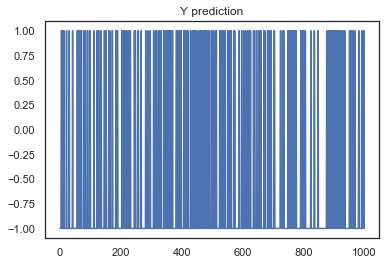

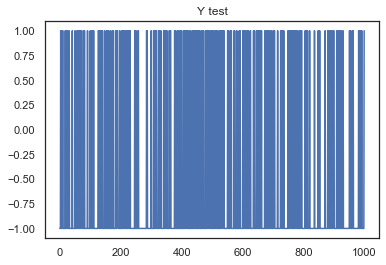

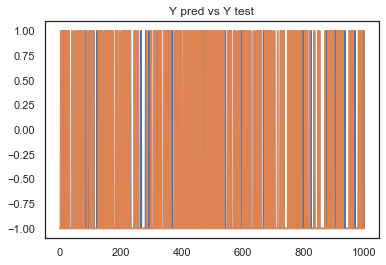

In [28]:
p=Pocket()
p.train(xtrain,ytrain)

# Prediction on train set
ypred=p.use(xtrain)

# Prediction on test set
ypred_test=p.use(xtest)

print(ypred)

plt.title("Y prediction")
plt.plot(ypred_test[0:1000])
plt.show()
plt.title("Y test")
plt.plot(ytest[0:1000])
plt.show()
plt.title("Y pred vs Y test")
plt.plot(ypred_test[0:1000])
plt.plot(ytest[0:1000])
plt.show()

### Accuracy and F1 score

In [29]:


from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(ytrain,ypred))
print('F1 score:', f1_score(ytrain,ypred))



Accuracy: 0.8230958230958231
F1 score: 0.6153846153846155


### Confusion Matrix of the test data

Text(0.5, 1, 'Confusion Matrix')

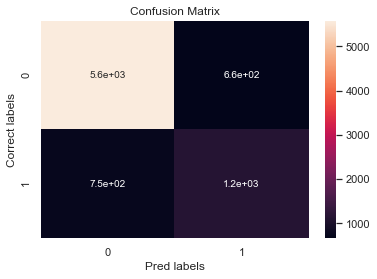

In [30]:
conf_mat = confusion_matrix(ytest, ypred_test)

FN = conf_mat[1][0]
TP = conf_mat[1][1]
FP = conf_mat[0][1]
TN = conf_mat[0][0]

axs = plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = axs)

axs.set_xlabel('Pred labels')
axs.set_ylabel('Correct labels')
axs.set_title('Confusion Matrix')


## Evaluation Metrics

### Recall

In [31]:
recall = TP / (TP+FN)
recall

0.6055672268907563

### Specificity

In [32]:
spec = TN/(TN+FP)
spec

0.894340227673561

### Precision

In [33]:
preci = TP/(TP+FP)
preci

0.6363134657836644

### ROC AUC Curve

In [34]:
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, ypred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)


roc_auc_score(ytest,ypred_test)

0.7499537272821586

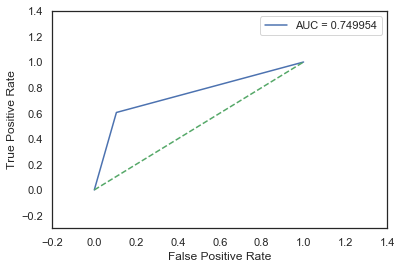

In [35]:
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.6f'% roc_auc)
plt.legend(loc='upper right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([-0.2,1.4])
plt.ylim([-0.3,1.4])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### C. QDA

Accuracy: 0.8010133578995855
F1 Score: 0.4198746642793196


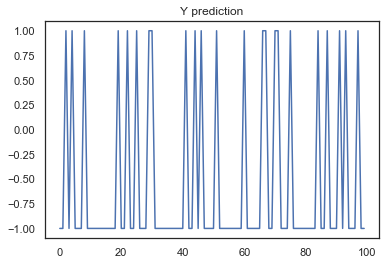

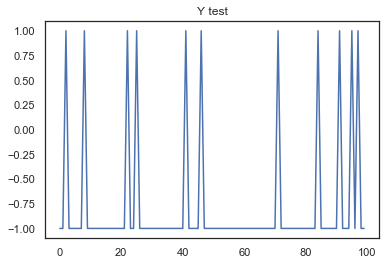

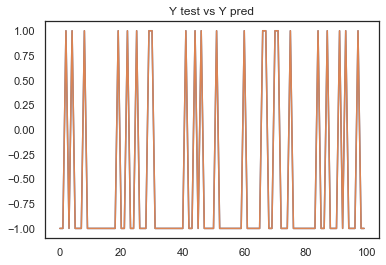

In [36]:
# Dividing data into train set and test set
from sklearn import model_selection
from sklearn.metrics import r2_score
t=dataset.iloc[:,-1]
df1_d=dataset.drop(['income'],axis=1)
X_train,X_test,y_train,y_test = model_selection.train_test_split(df1_d,t,test_size=0.20,random_state=40)

# Training
#q=QDA()
#q.train(X_train,y_train)

qda = QDA()
# Normalizing Training data
X_train_norm = qda.normalize(X_train)
# Filtering Training records based on Target Labels (-0,1)
X_class1 = X_train_norm[y_train==-1]
X_class2 = X_train_norm[y_train==1]

# Applying Training Data to train the QDA model
qda.train(X_class1,X_class2)

# Testing with Test Data
p1,p2 = qda.use(X_test)

#print(accuracy_score(true_train,pred_train))


X_test=[]

for i in range(p1.size):
    if p1[i] > p2[i]:
        X_test.append(-1)
    else:
        X_test.append(1)

pred_test = np.array(X_test)
true_test = np.array(y_test)

print('Accuracy:', accuracy_score(true_test,pred_test))
print('F1 Score:', f1_score(true_test,pred_test))
plt.title("Y prediction")
plt.plot(true_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(pred_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(np.array(true_test[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.show()

Text(0.5, 0.92, 'QDA Discriminant Functions')

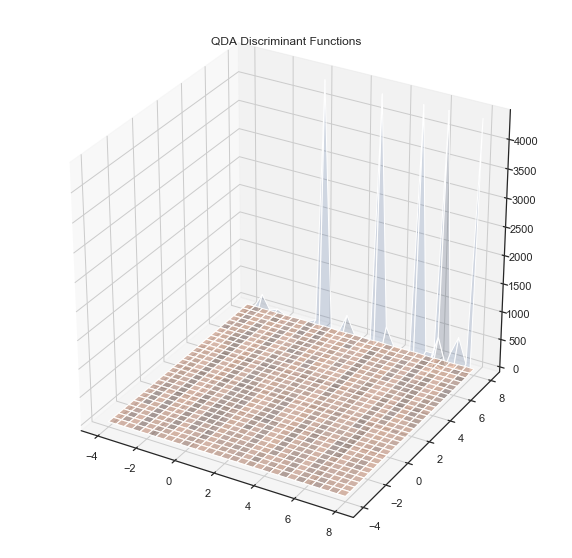

In [37]:
## now compute the discriminant function on test data
from mpl_toolkits.mplot3d import Axes3D
xs, ys = np.meshgrid(np.linspace(-4,8, 50), np.linspace(-4,8, 50))
from sklearn import model_selection
from sklearn.metrics import r2_score
t=dataset.iloc[:,-1]
df1_d=dataset.drop(['income'],axis=1)
xtrain,X_test,ytrain,y_test = model_selection.train_test_split(df1_d,t,test_size=0.20,random_state=40)

q=QDA1()
q.train(xtrain,ytrain)

from mpl_toolkits.mplot3d import Axes3D
p,d1_p,d2_p = q.use(X_test[:900])    #predicted


xs, ys = np.meshgrid(np.linspace(-4,8, 30), np.linspace(-4,8, 30))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_p.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_p.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Functions")



Text(0.5, 0.92, 'QDA Discriminant Functions')

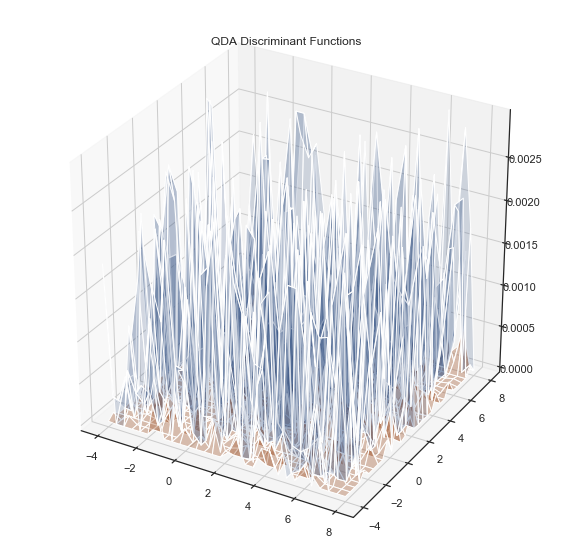

In [38]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
prob1 = np.exp( d1_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p1))
prob2 = np.exp( d2_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(q.p2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)

plt.title("QDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

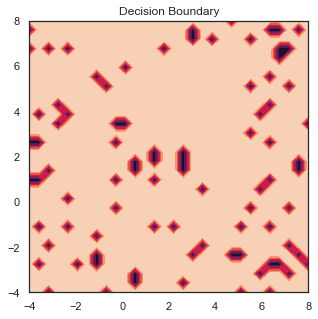

In [39]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

### Accuracy and F1 Score

In [40]:
#ypred_qda_train,d1,d2=q.use(X_train)

print('Accuracy:', accuracy_score(true_test,pred_test))
print('F1 Score:', f1_score(true_test,pred_test))

Accuracy: 0.8010133578995855
F1 Score: 0.4198746642793196


### Test data prediction

In [41]:
#ypred_qda_test,d1,d2=q.use(X_test)
print(p1)
print(p2)

[  0.84442356 -16.76909818 -27.23294044 ...  -0.54543725   1.10982562
   0.07198013]
[ -6.02015734 -19.04175817  -8.10364111 ...  -2.68339662  -7.02233287
  -7.7168357 ]


### Confusion Matrix

In [42]:
cf1=confusion_matrix(true_test, pred_test)
cf1

array([[4748,  206],
       [1090,  469]])

In [43]:
TN=cf1[0][0]
FP=cf1[0][1]
FN=cf1[1][0]
TP=cf1[1][1]
print("TN", TN)
print("FN", FN)
print("FP", FP)
print("TP", TP)


TN 4748
FN 1090
FP 206
TP 469


### Specificity

In [44]:
specificity=TN/(TN+FP)
specificity

0.9584174404521598

### Precision

In [45]:
precision=(TP/(TP+FP))
precision

0.6948148148148148

### Recall

In [46]:
recall=TP/(TP+FN)
recall

0.3008338678640154

### ROC AUC SCORE

In [47]:
roc_auc_score(true_test, pred_test)

0.6296256541580876

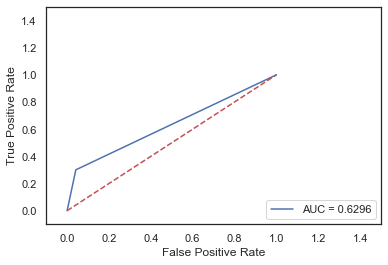

In [48]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(true_test, pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

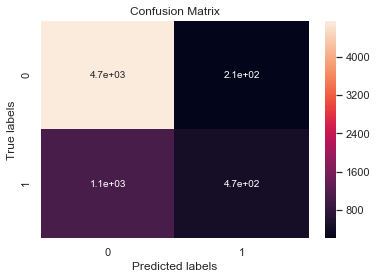

In [49]:
ax= plt.subplot()
sns.heatmap(cf1, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

### D. LDA

Accuracy: 0.24212991400491402
F1 score: 0.3898624632977902


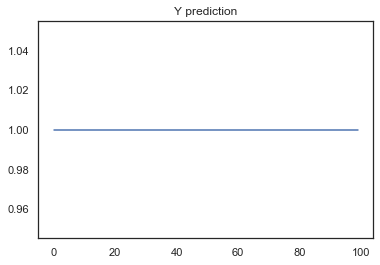

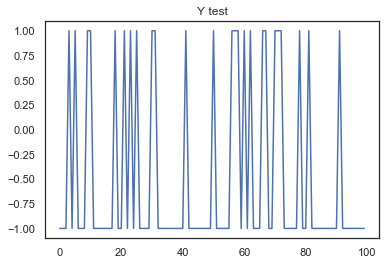

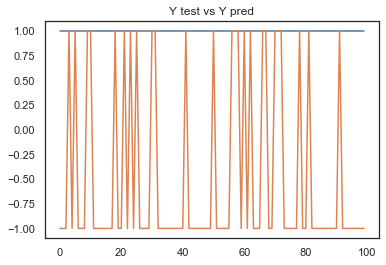

In [50]:
test =dataset.iloc[:,-1]
df1_d=dataset.drop(['income'],axis=1)
X_train,X_test,y_train,y_test = model_selection.train_test_split(df1_d,test,test_size=0.20,random_state=50)

#lda = LDA()
l=LDA1()
l.train(X_train,y_train)
ypred_lda_train,d1,d2=l.use(X_train)

print('Accuracy:', accuracy_score(y_train,ypred_lda_train))
print('F1 score:', f1_score(y_train,ypred_lda_train))

ypred_lda_test,d1,d2=l.use(X_test)


plt.title("Y prediction")
plt.plot(ypred_lda_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(ypred_lda_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()



### Accuracy and F1 score

In [51]:
print('Accuracy:', accuracy_score(y_train,ypred_lda_train))
print('F1 score:', f1_score(y_train,ypred_lda_train))

Accuracy: 0.24212991400491402
F1 score: 0.3898624632977902


In [52]:
ypred_lda_test,d1,d2=l.use(X_test)

### Confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix
cf2=confusion_matrix(y_test, ypred_lda_test)
cf2

array([[   0, 4979],
       [   0, 1534]])

In [54]:
TP=cf2[1][1]
TN=cf2[0][0]
FN=cf2[1][0]
FP=cf2[0][1]

### Recall, Specificity and Recall

In [55]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)
print('Precision: ' ,precision)
print('Specificity: ' ,specificity)
print('Recall: ' ,recall)


Precision:  0.23552894211576847
Specificity:  0.0
Recall:  1.0


### Accuracy and F1 for Test data

In [56]:
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

Accuracy: 0.23552894211576847
F1 score: 0.38126009693053314


### ROC AUC Score



In [57]:
roc_auc_score(y_test, ypred_lda_test)

0.5

In [58]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_lda_test)
roc_auc = auc(false_positive_rate, true_positive_rate)


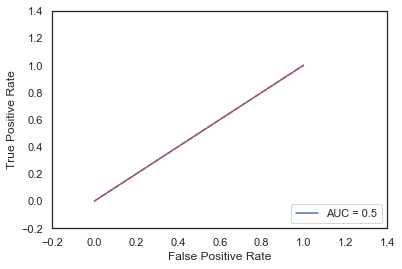

In [59]:
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.01f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.2,1.4])
plt.ylim([-0.2,1.4])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1, 'Confusion Matrix')

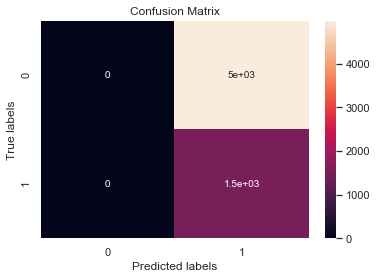

In [60]:
ax= plt.subplot()
sns.heatmap(cf2, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [61]:
p,d1_p,d2_p = l.use(X_test[:900]) #predicted


Text(0.5, 0.92, 'LDA Discriminant Functions')

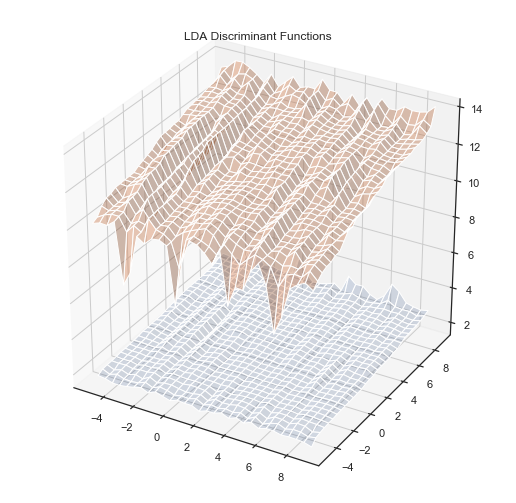

In [62]:
from mpl_toolkits.mplot3d import Axes3D
xs, ys = np.meshgrid(np.linspace(-5,9, 30), np.linspace(-5,9, 30))
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d1_p.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d2_p.reshape(xs.shape),0), alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 0.92, 'LDA Discriminant Functions')

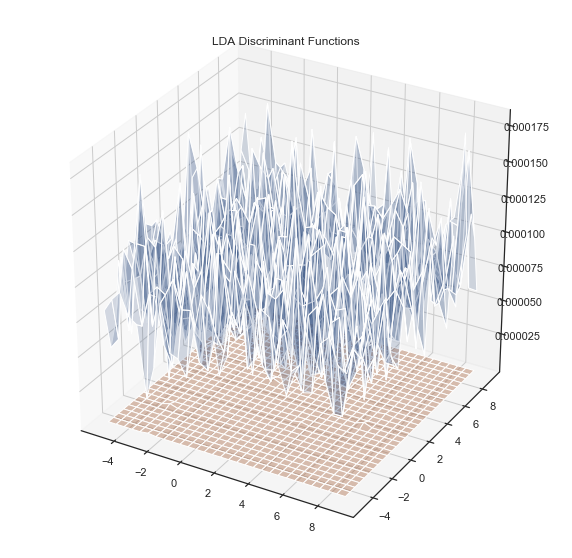

In [63]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
prob1 = np.exp( d1_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(l.p1))
prob2 = np.exp( d2_p.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(l.p2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

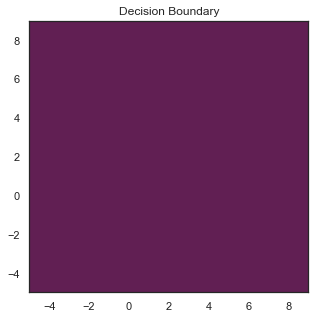

In [64]:
plt.figure(figsize=(5,5))
plt.contourf(xs, ys, (((d1_p-d2_p)) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

### E. Logistic Regression

In [65]:
lr = Logistic(0.0001)
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(df1_d, test,test_size=0.20,random_state=42)

In [66]:
lr.train(xtrain[:],np.array(ytrain[:]))
ypred_lr_train = lr.use(xtrain[:])
ypred_lr_train = np.argmax(ypred_lr_train, 1)
print(ypred_lr_train)
y_train=np.array(ytrain)
y_train=np.where(ytrain==-1,0,1)
print(y_train)

[0 0 0 ... 1 0 0]
[0 0 0 ... 1 1 0]


In [67]:
ypred_lr_test = lr.use(xtest[:])
ypred_lr_test

array([[0.72981807, 0.27018193],
       [0.98408471, 0.01591529],
       [0.7874314 , 0.2125686 ],
       ...,
       [0.25588309, 0.74411691],
       [0.97623725, 0.02376275],
       [0.88238032, 0.11761968]])

In [68]:
ypred_lr_test = np.argmax(ypred_lr_test, 1)
print(ypred_lr_test)
y_test=np.array(ytest)
y_test=np.where(ytest==-1,0,1)
print(y_test)

[0 0 0 ... 1 0 0]
[0 0 0 ... 1 0 1]


### Graphs

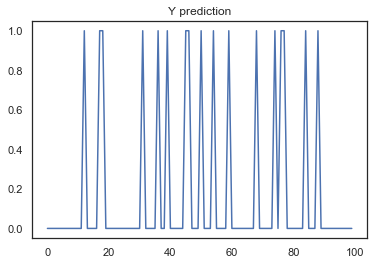

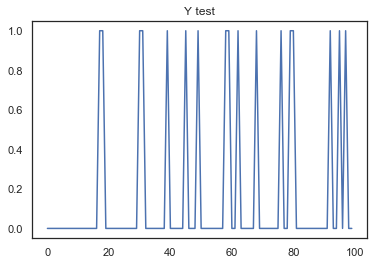

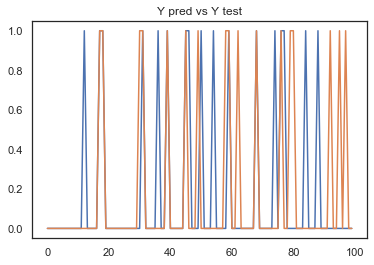

In [69]:
plt.title("Y prediction")
plt.plot(ypred_lr_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y pred vs Y test")
plt.plot(ypred_lr_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

### Accuracy and F1 score

In [70]:
print('Accuracy:', accuracy_score(y_train, ypred_lr_train))
print('F1 score:', f1_score(y_train, ypred_lr_train))

Accuracy: 0.8373387592137592
F1 score: 0.6181850950707398


### Confusion Matrix

In [71]:
cf3=confusion_matrix(y_test, ypred_lr_test)
cf3

array([[4605,  371],
       [ 705,  832]])

In [72]:
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]

print('TP',TP)
print('TN',TN)
print('FP',FP)
print('FN',FN)


TP 832
TN 4605
FP 371
FN 705


### Precision

In [73]:
precision=TP/(TP+FP)
precision

0.6916043225270158

### Recall

In [74]:
recall=TP/(TP+FN)
recall

0.5413142485361093

### Specificity

In [75]:
specificity=TN/(TN+FP)
specificity

0.9254421221864951

### ROC AUC Score

In [76]:
roc_auc_score(y_test, ypred_lr_test)

0.7333781853613023

Text(0.5, 1, 'Confusion Matrix')

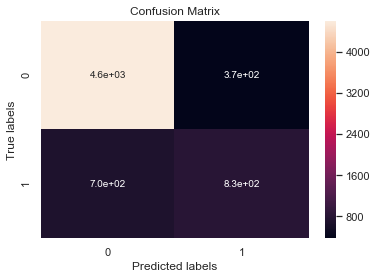

In [77]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

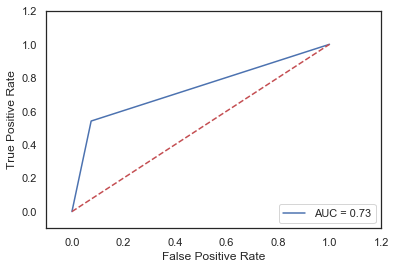

In [78]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ypred_lr_test)
roc_auc = auc(false_positive_rate, true_positive_rate)


##Plotting now
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Results

### Precision, Recall and Specificity

 - Precision is a fraction of relevant instances among the retrieved instances.
 
         precision = TP/(TP+FP)
 
 
 - Recall is the fraction of the total amount of relevant instances that were actually retrieved. 
 
         recall = TP/(TP/FN)

 - Spcecificity is calculated by the fraction of positive example with the positive test result.
          
         Specificity = TN/(TN+FP)

### Accuracy and F1 score

 - Accuracy is calculated the ratio of the total positive values to the total values
 
         Accuracy = (TN + TP)/Total
         
 - F1 Score: F1 is the overall measure of a model's accuracy that combines precision and recall. A good F1 score means that there are low false positives and low negatives.
 
         F1 = 2 * ((precision * recall)/(precision + recall))
         
  

### ROC Curve

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.



## Comparing the scores with all the models

### Pocket Algorithm

 - The result for this are as follows:
   - **Accuracy:** 0.8186644436644437

   - **F1 Score:** 0.6181850950707398
 

 - For the test data, the results are as follows:
    - **Recall:** 0.5988150655945832
 
    - **Specificity:** 0.8848231163921145
 
    - **Precision:** 0.6238977072310405
 
    - **AUC ROC Score:** 0.7418190909933489
 


From the stats above we can infer that this algorithm gave an accuracy of 81% and F1 score of 62% for training data. For testing data, the precision is 62%. 
 
 
### QDA

 - For the trained data,
 
   - **Accuracy**: 0.800291769041769

   - **F1 score**: 0.4313511149978137


 - For the test data, the results are as follows:

   - **Precision**: 0.69

   - **Specificity**: 0.9584174404521598

   - **Recall:** 0.3008338678640154

   - **ROC AUC Score:** 0.6296256541580876

From the stats above we can see that, recall is just 0.3. 






### LDA
 - For trained data,
 
   - **Accuracy:** 0.23936741900813757
   - **F1 score:** 0.38627353815659066
 

- For the test data, 
  - **Precision:**  0.6916043225270158
  - **Specificity:**  0.9254421221864951
  - **Recall:**  0.5413142485361093
 
 
### Logistic Regression

- For trained data, the result is: 

  - **Accuracy:** 0.8373387592137592

  - **F1 score:** 0.6273432449903038


- On test data, the results are: 

  - **Precision:** 0.6493328771809784

  - **Specificity:** 0.9254421221864951

  - **Recall:** 0.5413142485361093

  - **ROC AUC Score:** 0.7333781853613023

When compared to LDA, Logistic regression performed better with more accuracy. 


## Comparision of linear classification models

From the above statistics, we can observe that pocket Alogorithm is getting better output when compared to other algorithms and Logistic Regression gets the second position considering AUC and F1. The third place goes to Quadratic Discriminant Analysis with AUC score of 0.62. The Last place is the LDA. 

 - QDA: 
     - Precision: 0.69
     - Recall: 0.3008338678640154
     - Specificity: 0.9584174404521598
     
     
     
     
 - Pocket: 
 
     - Precision: 0.6238977072310405
     - Recall: 0.5988150655945832
     - Specificity: 0.8848231163921145
     
     
     
     
 - LDA: 
 
     - Precision:  0.6916043225270158
     - Specificity:  0.9254421221864951
     - Recall:  0.5413142485361093

     
     
     
     
 - Logistic Regression: 
 
     - Precision: 0.6493328771809784
     - Recall: 0.5413142485361093
     - Specificity: 0.9254421221864951


# Conclusions

From the evaluation and results that I calculated, I think pocket algorithm is the best when compared to others. Pocket and Logitic came close with almost similar values but Pocket leads with the F1 and accuracy scores. 

There were some challenges that I faced, trying to understand the math behind all the models, but this assignment aided me to understand better the difference and working behind these models.


# Extra Credit

In [79]:
dataset.info()
printmd("**As there are 32561 instances in my dataset, each test size would be of 6512 length**")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
age               32561 non-null int64
fnlwgt            32561 non-null int64
education.num     32561 non-null int64
marital.status    32561 non-null int64
sex               32561 non-null int64
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
income            32561 non-null int64
dtypes: int64(9)
memory usage: 2.2 MB


**As there are 32561 instances in my dataset, each test size would be of 6512 length**

In [80]:
data_1 = dataset.iloc[0:6512,:]
data_2 = dataset.iloc[6512:13024,:]
data_3 = dataset.iloc[13024:19536, : ]
data_4 = dataset.iloc[19536:26048,:]
data_5 = dataset.iloc[26048:,:]

test_1 = data_1
train_1 = pd.concat([data_2,data_3,data_4,data_5])

test_2 = data_2
train_2 = pd.concat([data_1,data_3,data_4,data_5])

test_3 = data_3
train_3 = pd.concat([data_1,data_2,data_4,data_5])

test_4 = data_4
train_4 = pd.concat([data_1,data_2,data_3,data_5])

test_5 = data_5
train_5 = pd.concat([data_1,data_2,data_3,data_5])


#print(train_1)


## Pocket

### Test 1

In [81]:

scaler = StandardScaler()

xtrain_1=train_1.drop(['income'],axis=1)
#print(xtrain_1)
xtest_1=test_1.drop(['income'],axis=1)
ytest_1=test_1['income']
ytrain_1=train_1['income']

ytrain_1=np.array(ytrain_1)
ytest_1=np.array(ytest_1)
xtrain_1=scaler.fit_transform(xtrain_1)
xtest_1=scaler.fit_transform(xtest_1)


pocket_1 = Pocket()

pocket_1.train(xtrain_1,ytrain_1)


[0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  9
[ 5.63885928e-05 -1.09969682e-04  2.73025476e-03  4.41107797e-03
 -6.06245358e-04  0.00000000e+00  0.00000000e+00 -1.66415652e-05]


F1 score: 0.73939766441303
Accuracy: 0.7395577395577395


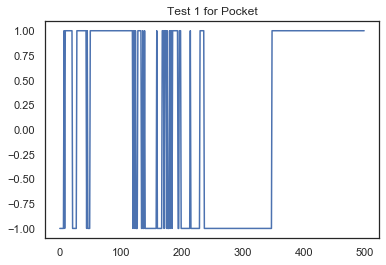

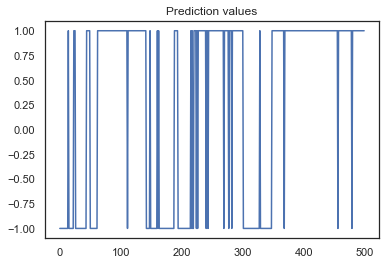

In [82]:
y = pocket_1.use(xtest_1)
print('F1 score:',f1_score(ytest_1,y))
print('Accuracy:', accuracy_score(ytest_1,y))

plt.title('Test 1 for Pocket')
plt.plot(ytest_1[0:500])
plt.show()
plt.title("Prediction values")
plt.plot(y[0:500])
plt.show()



### Test 2

[0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  9
[ 0.0003461   0.00072576  0.00470828  0.00387243 -0.00113897 -0.0025124
  0.02161155  0.00050218]
[0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  9
[ 0.0003461   0.00072576  0.00470828  0.00387243 -0.00113897 -0.0025124
  0.02161155  0.00050218]
F1 score: 0.5040946314831665
Accuracy: 0.6652334152334153


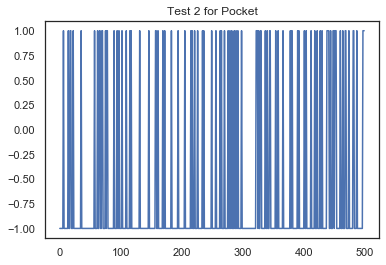

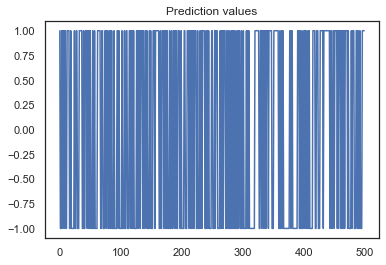

In [83]:
scaler = StandardScaler()

xtrain_2=train_2.drop(['income'],axis=1)
xtest_2=test_2.drop(['income'],axis=1)
ytest_2=test_2['income']
ytrain_2=train_2['income']

ytrain_2=np.array(ytrain_2)
ytest_2=np.array(ytest_2)
xtrain_2=scaler.fit_transform(xtrain_2)
xtest_2=scaler.fit_transform(xtest_2)


pocket_2 = Pocket()

pocket_2.train(xtrain_2,ytrain_2)





pocket_2 = Pocket()

pocket_2.train(xtrain_2,ytrain_2)

y_2 = pocket_2.use(xtest_2)
print('F1 score:',f1_score(ytest_2,y_2))
print('Accuracy:', accuracy_score(ytest_2,y_2))

plt.title('Test 2 for Pocket')
plt.plot(ytest_2[0:500])
plt.show()
plt.title("Prediction values")
plt.plot(y_2[0:500])
plt.show()



### Test 3

[0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  9
[ 0.00059993  0.00010891  0.00356499  0.00238864 -0.00099355 -0.00221647
  0.02006001  0.00104916]
[0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  9
[ 0.00059993  0.00010891  0.00356499  0.00238864 -0.00099355 -0.00221647
  0.02006001  0.00104916]
F1 score: 0.5063568610258659
Accuracy: 0.6541769041769042


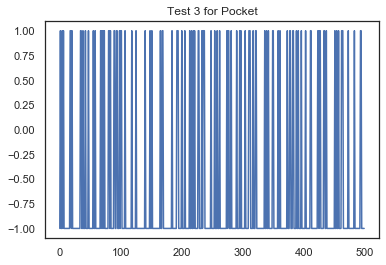

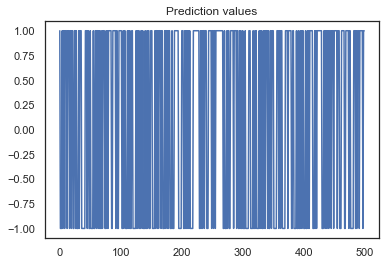

In [84]:
scaler = StandardScaler()

xtrain_3=train_3.drop(['income'],axis=1)
xtest_3=test_3.drop(['income'],axis=1)
ytest_3=test_3['income']
ytrain_3=train_3['income']

ytrain_3=np.array(ytrain_3)
ytest_3=np.array(ytest_3)
xtrain_3=scaler.fit_transform(xtrain_3)
xtest_3=scaler.fit_transform(xtest_3)


pocket_3 = Pocket()

pocket_3.train(xtrain_3,ytrain_3)



pocket_3 = Pocket()

pocket_3.train(xtrain_3,ytrain_3)

y_3 = pocket_3.use(xtest_3)
print('F1 score:',f1_score(ytest_3,y_3))
print('Accuracy:', accuracy_score(ytest_3,y_3))

plt.title('Test 3 for Pocket')
plt.plot(ytest_3[0:500])
plt.show()
plt.title("Prediction values")
plt.plot(y_3[0:500])
plt.show()



### Test 4

[0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  9
[-0.0002078  -0.00028734  0.00357803  0.00314963 -0.00088843 -0.00136131
  0.02009777 -0.00011347]
F1 score: 0.2727668845315904
Accuracy: 0.48740786240786244


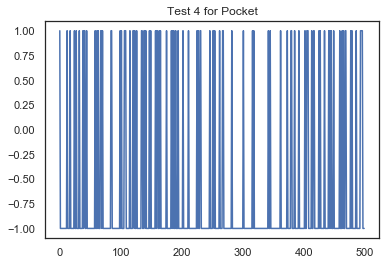

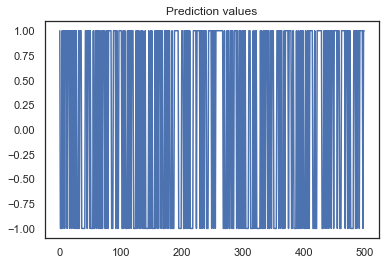

In [85]:

scaler = StandardScaler()

xtrain_4=train_4.drop(['income'],axis=1)
xtest_4=test_4.drop(['income'],axis=1)
ytest_4=test_4['income']
ytrain_4=train_4['income']

ytrain_4=np.array(ytrain_4)
ytest_4=np.array(ytest_4)
xtrain_4=scaler.fit_transform(xtrain_4)
xtest_4=scaler.fit_transform(xtest_4)




pocket_4 = Pocket()

pocket_4.train(xtrain_4,ytrain_4)

y_4 = pocket_4.use(xtest_3)
print('F1 score:',f1_score(ytest_4,y_4))
print('Accuracy:', accuracy_score(ytest_4,y_4))

plt.title('Test 4 for Pocket')
plt.plot(ytest_4[0:500])
plt.show()
plt.title("Prediction values")
plt.plot(y_4[0:500])
plt.show()



### Test 5

[0. 0. 0. 0. 0. 0. 0. 0.]
End of training:  9
[-0.0002078  -0.00028734  0.00357803  0.00314963 -0.00088843 -0.00136131
  0.02009777 -0.00011347]
F1 score: 0.0
Accuracy: 0.8077690772301551


/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


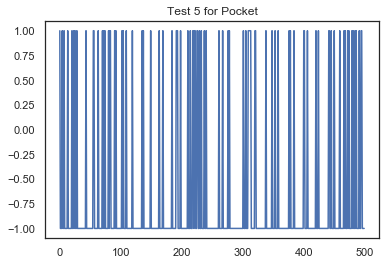

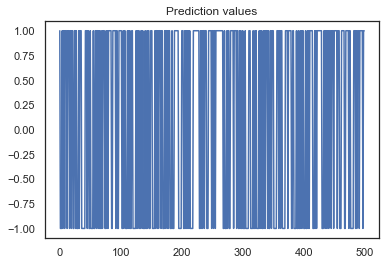

In [86]:
scaler = StandardScaler()

xtrain_5=train_5.drop(['income'],axis=1)
xtest_5=test_5.drop(['income'],axis=1)
ytest_5=test_5['income']
ytrain_5=train_5['income']

ytrain_5=np.array(ytrain_5)
ytest_5=np.array(ytest_5)
xtrain_5=scaler.fit_transform(xtrain_5)
xtest_3=scaler.fit_transform(xtest_5)




pocket_5 = Pocket()

pocket_5.train(xtrain_5,ytrain_5)

y_5 = pocket_5.use(xtest_5)
print('F1 score:',f1_score(ytest_5,y_5))
print('Accuracy:', accuracy_score(ytest_5,y_5))

plt.title('Test 5 for Pocket')
plt.plot(ytest_5[0:500])
plt.show()
plt.title("Prediction values")
plt.plot(y_3[0:500])
plt.show()



### Result 

From the tests above I observed that test1 has the highest F1 score of 60% comapared to others. Test 4 and Test 3 gave almost similar results with respect to F1 and Accuracy.


## QDA

### Test 1

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2093: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Accuracy: 0.5542076167076168
F1 score: 0.0


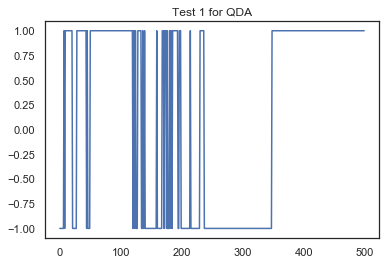

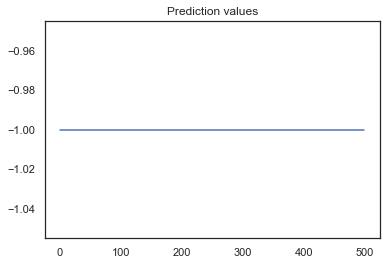

In [87]:
scaler = StandardScaler()

xtrain_qda_1=train_1.drop(['income'],axis=1)
xtest_qda_1=test_1.drop(['income'],axis=1)
ytest_qda_1=test_1['income']
ytrain_qda_1=train_1['income']

qda_1 = QDA1()
qda_1.train(xtrain_qda_1,ytrain_qda_1)
y_qda_1,d1,d2 = qda_1.use(xtest_qda_1)

print('Accuracy:', accuracy_score(ytest_qda_1, y_qda_1))
print('F1 score:', f1_score(ytest_qda_1, y_qda_1))

plt.title('Test 1 for QDA')
plt.plot(ytest_qda_1[0:500])
plt.show()
plt.title("Prediction values")
plt.plot(y_qda_1[0:500])
plt.show()


### Test 2

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.8157248157248157
F1 score: 0.0


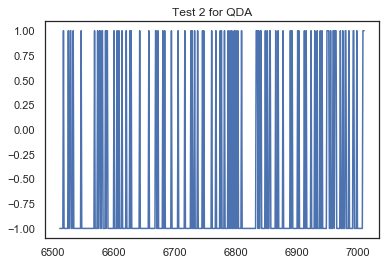

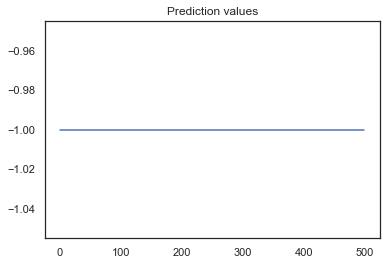

In [88]:
scaler = StandardScaler()

xtrain_qda_2=train_2.drop(['income'],axis=1)

#print(xtrain_qda_2)

xtest_qda_2=test_2.drop(['income'],axis=1)
ytest_qda_2=test_2['income']
ytrain_qda_2=train_2['income']

qda_2 = QDA1()
qda_2.train(xtrain_qda_2,ytrain_qda_2)
y_qda_2,d1,d2 = qda_2.use(xtest_qda_2)

print('Accuracy:', accuracy_score(ytest_qda_2, y_qda_2))
print('F1 score:', f1_score(ytest_qda_2, y_qda_2))

plt.title('Test 2 for QDA')
plt.plot(ytest_qda_2[0:500])
plt.show()
plt.title("Prediction values")
plt.plot(y_qda_2[0:500])
plt.show()

### Test 3

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.1911855036855037
F1 score: 0.3210003867474539


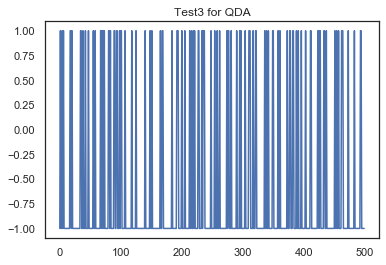

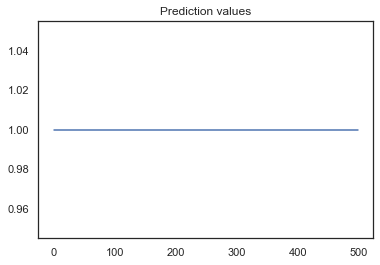

In [89]:
scaler = StandardScaler()

xtrain_qda_3=train_3.drop(['income'],axis=1)
xtest_qda_3=test_3.drop(['income'],axis=1)
ytest_qda_3=test_3['income']
ytrain_qda_3=train_3['income']

qda_3 = QDA()

qda = QDA()
# Normalizing Training data
X_train_norm = qda.normalize(xtrain_qda_3)
# Filtering Training records based on Target Labels (-0,1)
X_class1 = X_train_norm[ytrain_qda_3==-1]
X_class2 = X_train_norm[ytrain_qda_3==1]

# Applying Training Data to train the QDA model
qda.train(X_class1,X_class2)
# Testing with Test Data
p1,p2 = qda.use(xtest_qda_3)
#accuracy_score(true_train,pred_train))
X_test=[]
for i in range(p1.size):
    if p1[i] > p2[i]:
        X_test.append(0)
    else:
        X_test.append(1)

pred_test = np.array(X_test)
true_test = np.array(ytest_qda_3)
#print('Accuracy:', accuracy_score(true_test,pred_test))



#qda_3.train(xtrain_qda_3,ytrain_qda_3)
#y_qda_3,d1,d2 = qda_3.use(xtest_qda_3)

print('Accuracy:', accuracy_score(true_test, pred_test))
print('F1 score:', f1_score(true_test, pred_test))

plt.title('Test3 for QDA')
plt.plot(true_test[0:500])
plt.show()
plt.title("Prediction values")
plt.plot(pred_test[0:500])
plt.show()

### Test 4

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.8094287469287469
F1 score: 0.0


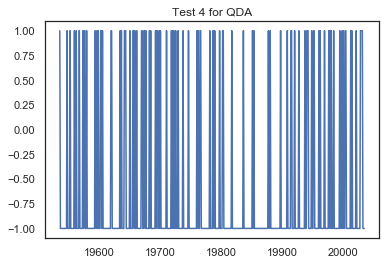

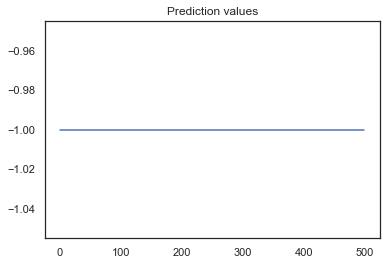

In [90]:
scaler = StandardScaler()

xtrain_qda_4=train_4.drop(['income'],axis=1)
xtest_qda_4=test_4.drop(['income'],axis=1)
ytest_qda_4=test_4['income']
ytrain_qda_4=train_4['income']

qda_4 = QDA1()
qda_4.train(xtrain_qda_4,ytrain_qda_4)
y_qda_4,d1,d2 = qda_4.use(xtest_qda_4)

print('Accuracy:', accuracy_score(ytest_qda_4, y_qda_4))
print('F1 score:', f1_score(ytest_qda_4, y_qda_4))

plt.title('Test 4 for QDA')
plt.plot(ytest_qda_4[0:500])
plt.show()
plt.title("Prediction values")
plt.plot(y_qda_4[0:500])
plt.show()

### Test 5

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.8077690772301551
F1 score: 0.0


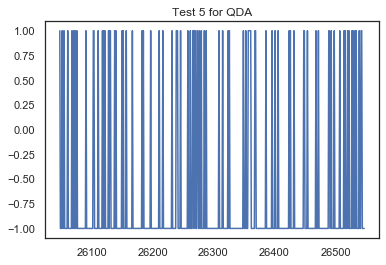

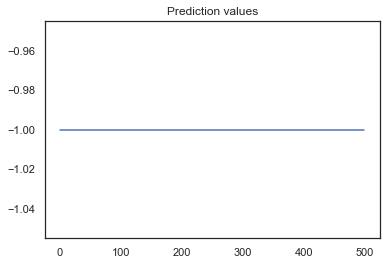

In [91]:
scaler = StandardScaler()

xtrain_qda_5=train_5.drop(['income'],axis=1)
xtest_qda_5=test_5.drop(['income'],axis=1)
ytest_qda_5=test_5['income']
ytrain_qda_5=train_5['income']

qda_5 = QDA1()
qda_5.train(xtrain_qda_5,ytrain_qda_5)
y_qda_5,d1,d2 = qda_5.use(xtest_qda_5)

print('Accuracy:', accuracy_score(ytest_qda_5, y_qda_5))
print('F1 score:', f1_score(ytest_qda_5, y_qda_5))

plt.title('Test 5 for QDA')
plt.plot(ytest_qda_5[0:500])
plt.show()
plt.title("Prediction values")
plt.plot(y_qda_5[0:500])
plt.show()

From the tests above we can see that the highest F1 was scored in the second test. the accuracy came around 81%. The f1 score was zero for all the tests except test 1. But accuracy is the lowest for test 1 with only 19%.

## LDA

### Test 1

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.4457923832923833
F1 score: 0.6166755177907594


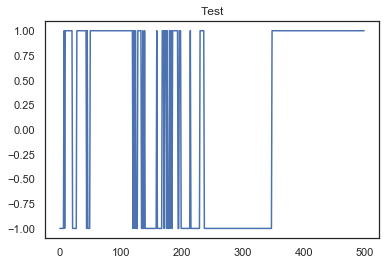

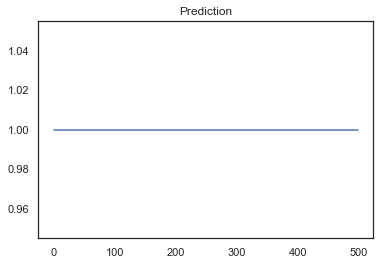

In [92]:
y_test=test_1['income']
y_train=train_1['income']
X_train=train_1.drop(['income'],axis=1)
X_test=test_1.drop(['income'],axis=1)

lda=LDA1()
lda.train(X_train,y_train)
ypred_lda_test,d1,d2=l.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

plt.title("Test")
plt.plot(y_test[0:500])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lda_test[0:500])
plt.show()

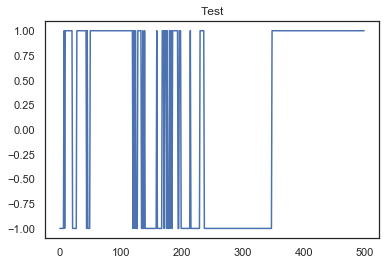

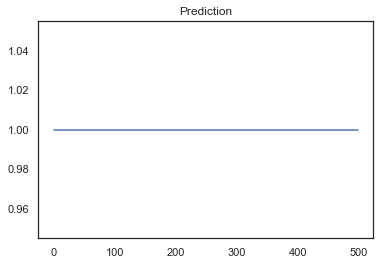

In [93]:
plt.title("Test")
plt.plot(y_test[0:500])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lda_test[0:500])
plt.show()

### Test 2

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.8157248157248157
F1 score: 0.0


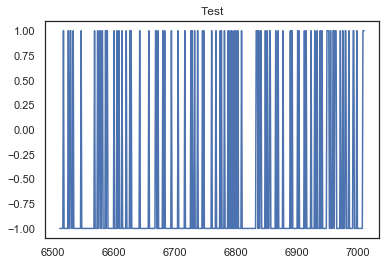

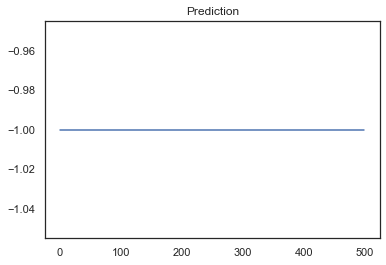

In [94]:
y_test=test_2['income']
y_train=train_2['income']
X_train=train_2.drop(['income'],axis=1)
X_test=test_2.drop(['income'],axis=1)

lda=LDA1()
lda.train(X_train,y_train)
ypred_lda_test,d1,d2=l.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

plt.title("Test")
plt.plot(y_test[0:500])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lda_test[0:500])
plt.show()

### Test 3

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.8088144963144963
F1 score: 0.0


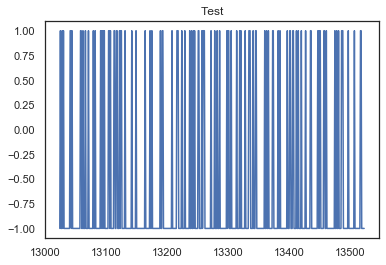

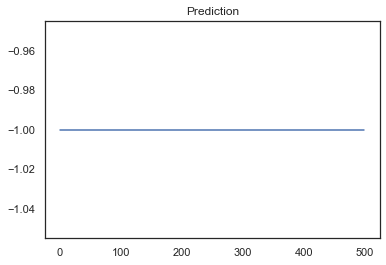

In [95]:
y_test=test_3['income']
y_train=train_3['income']
X_train=train_3.drop(['income'],axis=1)
X_test=test_3.drop(['income'],axis=1)

lda=LDA1()
lda.train(X_train,y_train)
ypred_lda_test,d1,d2=l.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

plt.title("Test")
plt.plot(y_test[0:500])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lda_test[0:500])
plt.show()

### Test 4

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.8094287469287469
F1 score: 0.0


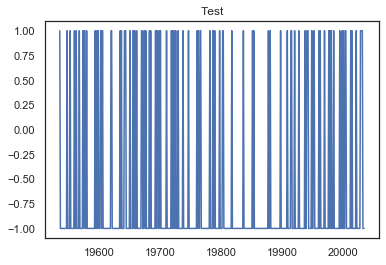

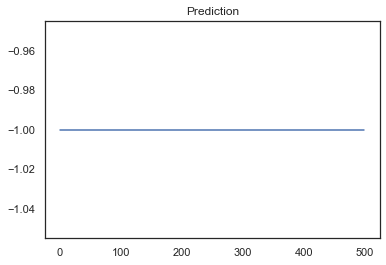

In [96]:
y_test=test_4['income']
y_train=train_4['income']
X_train=train_4.drop(['income'],axis=1)
X_test=test_4.drop(['income'],axis=1)

lda=LDA1()
lda.train(X_train,y_train)
ypred_lda_test,d1,d2=l.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

plt.title("Test")
plt.plot(y_test[0:500])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lda_test[0:500])
plt.show()

### Test 5

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.8077690772301551
F1 score: 0.0


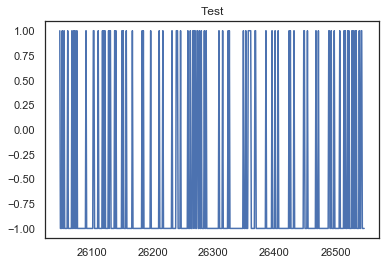

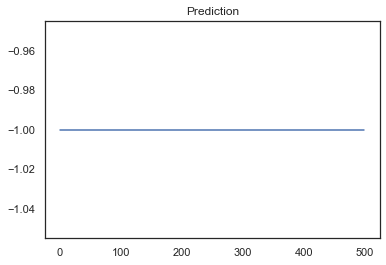

In [97]:
y_test=test_5['income']
y_train=train_5['income']
X_train=train_5.drop(['income'],axis=1)
X_test=test_5.drop(['income'],axis=1)

lda=LDA1()
lda.train(X_train,y_train)
ypred_lda_test,d1,d2=l.use(X_test)
print('Accuracy:', accuracy_score(y_test, ypred_lda_test))
print('F1 score:', f1_score(y_test, ypred_lda_test))

plt.title("Test")
plt.plot(y_test[0:500])
plt.show()
plt.title("Prediction")
plt.plot(ypred_lda_test[0:500])
plt.show()

## Logistic Regression

### Test1

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.7151412776412777
F1 score: 0.5529043142926006


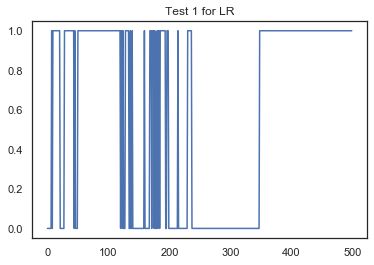

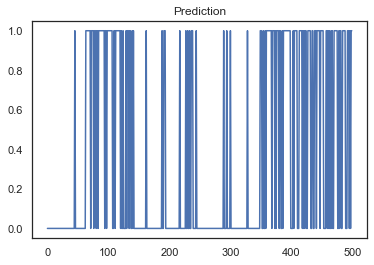

In [98]:


xtrain_lr=train_1.drop(['income'],axis=1)
xtest_lr=test_1.drop(['income'],axis=1)
ytest_lr=test_1['income']
ytrain_lr=train_1['income']

ytest_lr=np.array(ytest_lr)
ytest_lr=np.where(ytest_lr==-1,0,1)

lr_1 = Logistic(0.0001)
lr_1.train(xtrain_lr[:],np.array(ytrain_lr[:]))
y_lr = lr.use(xtest_lr[:])
y_lr = np.argmax(y_lr, 1)

print('Accuracy:', accuracy_score(ytest_lr, y_lr))
print('F1 score:', f1_score(ytest_lr, y_lr))

plt.title("Test 1 for LR")
plt.plot(ytest_lr[0:500])
plt.show()
plt.title("Prediction")
plt.plot(y_lr[0:500])

plt.show()

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.8157248157248157
F1 score: 0.0


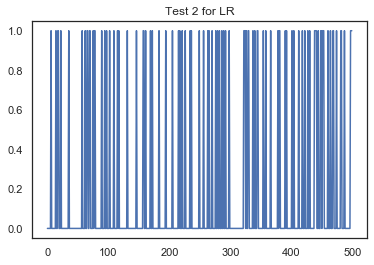

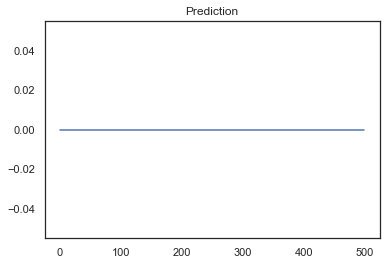

In [99]:

xtrain_lr_2=train_2.drop(['income'],axis=1)
xtest_lr_2=test_2.drop(['income'],axis=1)
ytest_lr_2=test_2['income']
ytrain_lr_2=train_2['income']

ytest_lr_2=np.array(ytest_lr_2)
ytest_lr_2=np.where(ytest_lr_2==-1,0,1)

lr_2 = Logistic(0.0001)
lr_2.train(xtrain_lr_2[:],np.array(ytrain_lr_2[:]))
y_lr_2 = lr_2.use(xtest_lr_2[:])
y_lr_2 = np.argmax(y_lr_2, -1)

print('Accuracy:', accuracy_score(ytest_lr_2, y_lr_2))
print('F1 score:', f1_score(ytest_lr_2, y_lr_2))

plt.title("Test 2 for LR")
plt.plot(ytest_lr_2[0:500])
plt.show()
plt.title("Prediction")
plt.plot(y_lr_2[0:500])
plt.show()

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.8088144963144963
F1 score: 0.0


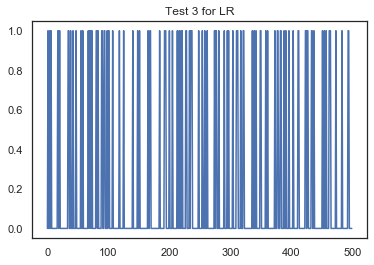

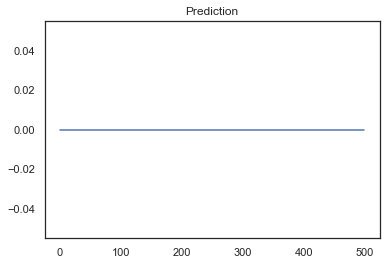

In [100]:
xtrain_lr=train_3.drop(['income'],axis=1)
xtest_lr=test_3.drop(['income'],axis=1)
ytest_lr=test_3['income']
ytrain_lr=train_3['income']

ytest_lr=np.array(ytest_lr)
ytest_lr=np.where(ytest_lr==-1,0,1)

lr_3 = Logistic(0.0001)
lr_3.train(xtrain_lr[:],np.array(ytrain_lr[:]))
y_lr = lr_3.use(xtest_lr[:])
y_lr = np.argmax(y_lr, 1)

print('Accuracy:', accuracy_score(ytest_lr, y_lr))
print('F1 score:', f1_score(ytest_lr, y_lr))

plt.title("Test 3 for LR")
plt.plot(ytest_lr[0:500])
plt.show()
plt.title("Prediction")
plt.plot(y_lr[0:500])
plt.show()

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.8094287469287469
F1 score: 0.0


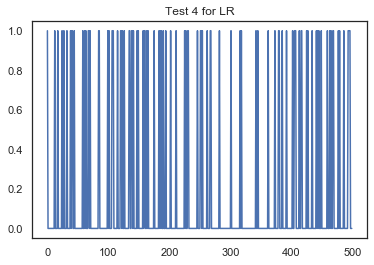

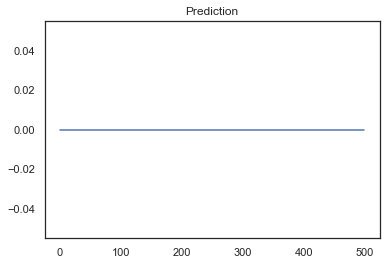

In [101]:
xtrain_lr=train_4.drop(['income'],axis=1)
xtest_lr=test_4.drop(['income'],axis=1)
ytest_lr=test_4['income']
ytrain_lr=train_4['income']

ytest_lr=np.array(ytest_lr)
ytest_lr=np.where(ytest_lr==-1,0,1)

lr_1 = Logistic(0.001)
lr_1.train(xtrain_lr[:],np.array(ytrain_lr[:]))
y_lr = lr.use(xtest_lr[:])
y_lr = np.argmax(y_lr, 1)

print('Accuracy:', accuracy_score(ytest_lr, y_lr))
print('F1 score:', f1_score(ytest_lr, y_lr))

plt.title("Test 4 for LR")
plt.plot(ytest_lr[0:500])
plt.show()
plt.title("Prediction")
plt.plot(y_lr[0:500])
plt.show()

/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/alekhyamajeti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Accuracy: 0.8077690772301551
F1 score: 0.0


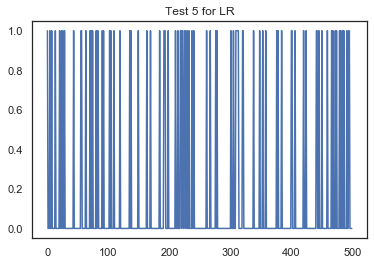

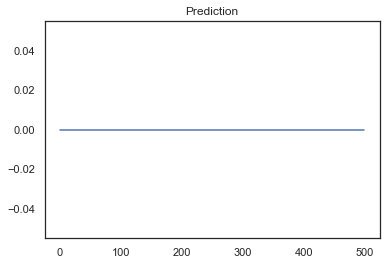

In [102]:
xtrain_lr=train_5.drop(['income'],axis=1)
xtest_lr=test_5.drop(['income'],axis=1)
ytest_lr=test_5['income']
ytrain_lr=train_5['income']

ytest_lr=np.array(ytest_lr)
ytest_lr=np.where(ytest_lr==-1,0,1)

lr_1 = Logistic(0.001)
lr_1.train(xtrain_lr[:],np.array(ytrain_lr[:]))
y_lr = lr.use(xtest_lr[:])
y_lr = np.argmax(y_lr, 1)

print('Accuracy:', accuracy_score(ytest_lr, y_lr))
print('F1 score:', f1_score(ytest_lr, y_lr))

plt.title("Test 5 for LR")
plt.plot(ytest_lr[0:500])
plt.show()
plt.title("Prediction")
plt.plot(y_lr[0:500])
plt.show()

### Conclusion for the tests

From the tests done above for all the models, partitioning all the datasets which are partitioned into 5 datasets and trained 5 seperate times, gave different results than the main one above. The highest F1 score among all the models is Logistic Regression. With the main method the F1 score was around 0.62. In the fives tests that were carried out under logistic regression, the f1 scores were as follows, 0.55,0, 0.2, 0.3. The average of these comes around, 0.25 which is way lesser than the whole training data. Similar trend is observed in QDA, LDA and Pocket. LDA had an F1 score without splitting of 0.4 and the average of the five test sets came around 0.25. For Pocket the main training data had an F1 score of 62 and the average of five test sets came around 0.39. So from the results above we can clearly decide that partitioning data is not a good idea. It woudn't give the results that you want. 

# References

 - https://en.wikipedia.org/wiki/Linear_discriminant_analysis
 - http://uc-r.github.io/discriminant_analysis
 - https://en.wikipedia.org/wiki/Quadratic_classifier
 - https://docs.rapidminer.com/latest/studio/operators/modeling/predictive/discriminant_analysis/quadratic_discriminant_analysis.html
 - https://en.wikipedia.org/wiki/Logistic_regression
 - https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.ipynb
 - https://datascienceplus.com/how-to-perform-logistic-regression-lda-qda-in-r/
 - https://www.kaggle.com/uciml/adult-census-income
 - https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/utils/data_operation.py
 - https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
 - https://page-one.springer.com/pdf/preview/10.1007/3-540-59119-2_185
 